# Model training

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the preprocessed dataset from a file

In [2]:
df = pd.read_csv('processed_dataset_v3.csv')

df.head(100)

,match_id,has_team_won,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,team_heroes_pick_confidence_score_allies_sum,...,team_players_net_sum,team_players_assists_number_sum,team_player_deaths_number_sum,team_players_kills_number_sum,team_hero_lvls_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
0,7393031014,True,1147,10.985433,993,-1.498229,1528.0,-0.830002,1409.4,-8,...,42138,84,-30,32,4.4,-0.475690,4.914816,1.816724,4.16994,1.62654
1,7393139706,True,1078,0.301894,191,-3.485422,812.8,-2.778400,754.6,4,...,25677,28,-7,6,1.0,-1.285879,2.560724,0.982756,1.31134,1.40456
2,7393178003,True,308,5.750341,131,2.017350,-1255.2,1.295491,-1291.0,0,...,25173,0,-3,2,0.4,0.506771,-3.103768,1.648532,-3.93056,1.33496
3,7393196807,False,-616,3.685672,862,-2.027335,2763.4,0.516487,2767.6,-2,...,-29915,-57,28,-30,-3.8,0.141931,-4.398308,2.334400,-3.72034,2.20772
4,7393211000,True,-2310,6.930735,-125,-1.872473,451.8,-3.235953,443.0,4,...,29481,47,-22,21,3.2,0.035616,3.331552,0.007632,3.41668,0.29068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7396056914,False,-770,-4.302888,90,-1.694576,989.0,-0.466361,961.0,1,...,-37523,-85,37,-38,-4.2,-0.026572,-1.746372,-0.175764,-1.96964,-0.24070
96,7396073211,False,-4312,-15.691832,57,-5.121293,-189.0,-3.598325,-236.0,-3,...,-38748,-93,37,-37,-4.0,-0.299637,2.373432,-1.502356,1.10492,-1.88772
97,7396086506,True,924,-0.135184,548,-0.888792,1308.8,0.706847,1241.0,0,...,34991,33,-22,22,2.6,-0.119593,3.582832,0.083756,4.25742,0.51344
98,7396086610,False,-1848,0.287544,-485,1.003415,-1940.0,1.410999,-2038.4,2,...,-25759,-32,15,-15,-2.4,0.396458,1.334608,-2.539168,0.38906,-3.26688


In [3]:
df.describe()

,match_id,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,team_heroes_pick_confidence_score_allies_sum,team_heroes_pick_confidence_score_enemies_sum,...,team_players_net_sum,team_players_assists_number_sum,team_player_deaths_number_sum,team_players_kills_number_sum,team_hero_lvls_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
count,1.229600e+04,12296.000000,1.229600e+04,12296.00000,1.229600e+04,1.229600e+04,1.229600e+04,1.229600e+04,12296.000000,12296.000000,...,12296.000000,12296.000000,12296.000000,12296.00000,1.229600e+04,12296.000000,1.229600e+04,12296.000000,1.229600e+04,12296.000000
mean,7.519260e+09,0.000000,-3.467190e-18,0.00000,5.778649e-19,8.876006e-16,-2.311460e-18,-8.876006e-16,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,4.622920e-18,0.000000,-4.622920e-18,0.000000,-9.245839e-18,0.000000
std,7.484674e+07,1653.604154,9.089679e+00,710.26896,1.860782e+00,8.360972e+02,1.936199e+00,8.340358e+02,4.298065,3.023239,...,29740.789826,44.726897,19.849683,20.19551,3.041604e+00,0.408811,3.332724e+00,1.420015,3.693444e+00,1.663948
min,7.393031e+09,-7930.000000,-4.102612e+01,-6688.00000,-1.142173e+01,-4.215600e+03,-1.177328e+01,-4.236400e+03,-14.000000,-10.000000,...,-78694.000000,-146.000000,-60.000000,-60.00000,-7.600000e+00,-4.219236,-1.167806e+01,-5.302040,-1.330644e+01,-6.250360
25%,7.470030e+09,-1078.000000,-5.765606e+00,-272.00000,-1.090640e+00,-5.286000e+02,-1.180015e+00,-5.284000e+02,-3.000000,-2.000000,...,-28351.500000,-37.000000,-17.000000,-17.00000,-2.800000e+00,-0.257959,-2.289535e+00,-0.959774,-2.509760e+00,-1.105985
50%,7.506882e+09,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,7.586232e+09,1078.000000,5.765606e+00,272.00000,1.090640e+00,5.286000e+02,1.180015e+00,5.284000e+02,3.000000,2.000000,...,28351.500000,37.000000,17.000000,17.00000,2.800000e+00,0.257959,2.289535e+00,0.959774,2.509760e+00,1.105985
max,7.672827e+09,7930.000000,4.102612e+01,6688.00000,1.142173e+01,4.215600e+03,1.177328e+01,4.236400e+03,14.000000,10.000000,...,78694.000000,146.000000,60.000000,60.00000,7.600000e+00,4.219236,1.167806e+01,5.302040,1.330644e+01,6.250360


### Drop all the irrelevant columns (in-game data, ids, etc)

In [4]:
columns_to_drop = ['match_id', 'team_players_xpm_sum', 'team_players_gpm_sum', 'team_players_denies_sum', 'team_players_lasthits_sum', 'team_players_net_sum', 
                   'team_players_assists_number_sum', 'team_player_deaths_number_sum', 'team_players_kills_number_sum','team_hero_lvls_mean']

df = df.drop(columns=columns_to_drop)

df.columns

Index(['has_team_won', 'team_q_mmr_diff_sum',
       'team_heroes_winrate_overall_mean',
       'team_heroes_total_matches_played_sum',
       'team_players_dire_winrate_all_time_mean',
       'team_players_dire_games_played_all_time_mean',
       'team_players_radiant_winrate_all_time_mean',
       'team_players_radiant_games_played_all_time_mean',
       'team_heroes_pick_confidence_score_allies_sum',
       'team_heroes_pick_confidence_score_enemies_sum',
       'team_heroes_pick_confidence_score_total_sum',
       'team_players__time_played_all_matches_mean',
       'team_players_winrate_over_time_mean',
       'team_players_all_matches_played_number_mean',
       'team_players_matches_abandonment_rate_mean',
       'team_players_matches_lost_mean', 'team_players_matches_won_mean',
       'team_players_match_rank_initial_mmr_mean',
       'team_players_kda_average_all_matches_mean',
       'team_heroes_pickrate_average_mean', 'team_heroes_winrate_average_mean',
       'team_heroes_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   has_team_won                                     12296 non-null  bool   
 1   team_q_mmr_diff_sum                              12296 non-null  int64  
 2   team_heroes_winrate_overall_mean                 12296 non-null  float64
 3   team_heroes_total_matches_played_sum             12296 non-null  int64  
 4   team_players_dire_winrate_all_time_mean          12296 non-null  float64
 5   team_players_dire_games_played_all_time_mean     12296 non-null  float64
 6   team_players_radiant_winrate_all_time_mean       12296 non-null  float64
 7   team_players_radiant_games_played_all_time_mean  12296 non-null  float64
 8   team_heroes_pick_confidence_score_allies_sum     12296 non-null  int64  
 9   team_heroes_pick_confidence_

### Data visualisation

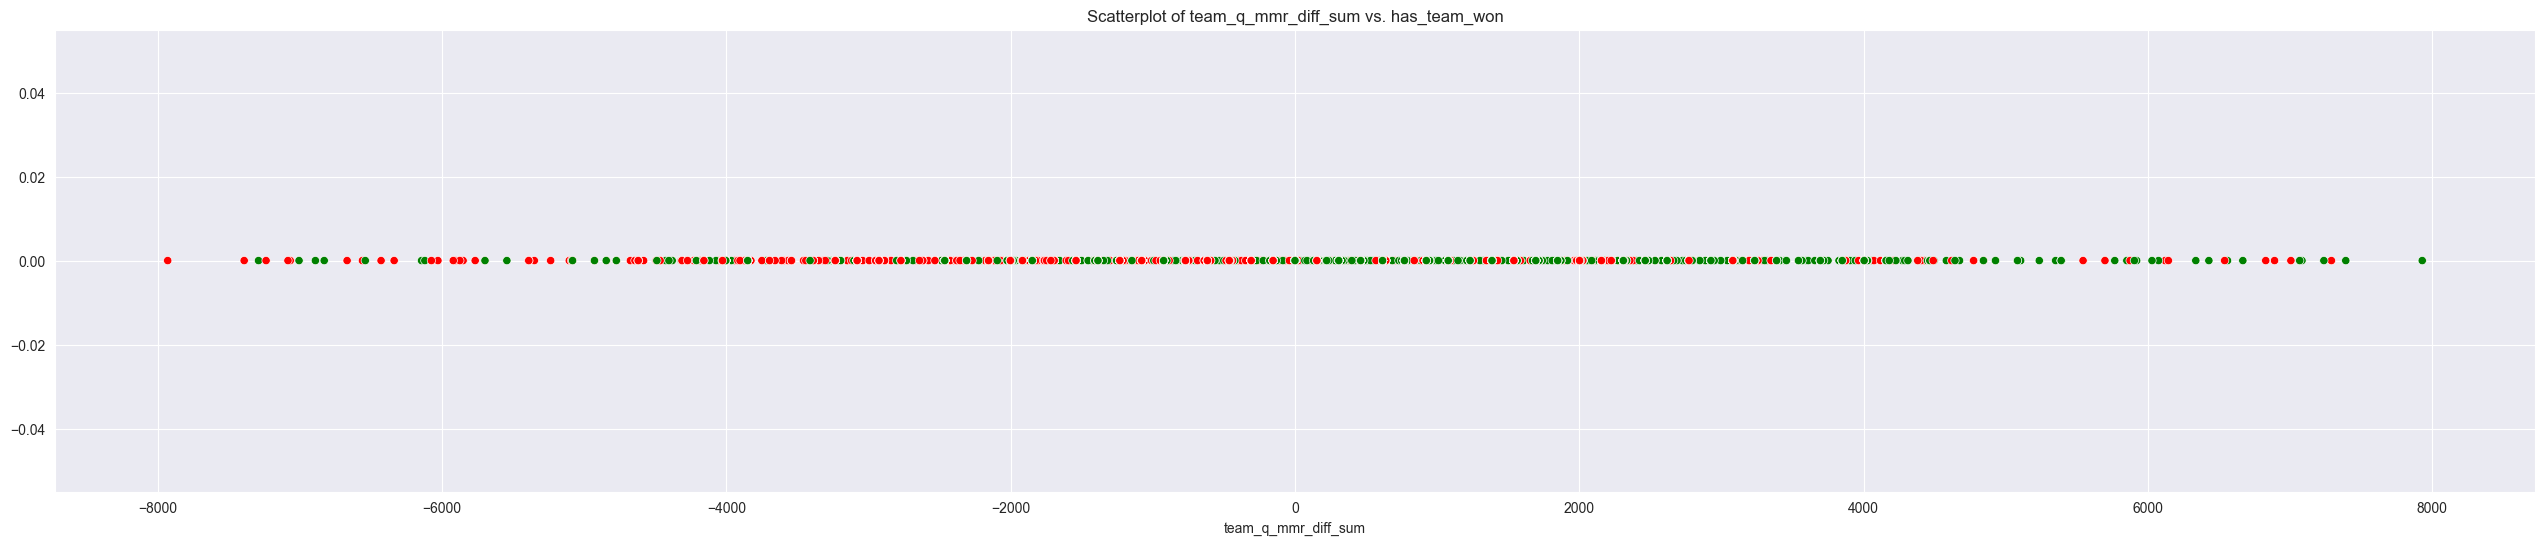

In [6]:
colors = {0: 'red', 1: 'green'}  # 0 for loss, 1 for win

df['dummy'] = 0

plt.figure(figsize=(32, 6))
sns.scatterplot(x='team_q_mmr_diff_sum', y='dummy', hue='has_team_won', palette=colors, data=df, legend=None)

plt.xlabel('team_q_mmr_diff_sum')
plt.ylabel('')
plt.title('Scatterplot of team_q_mmr_diff_sum vs. has_team_won')

plt.show()

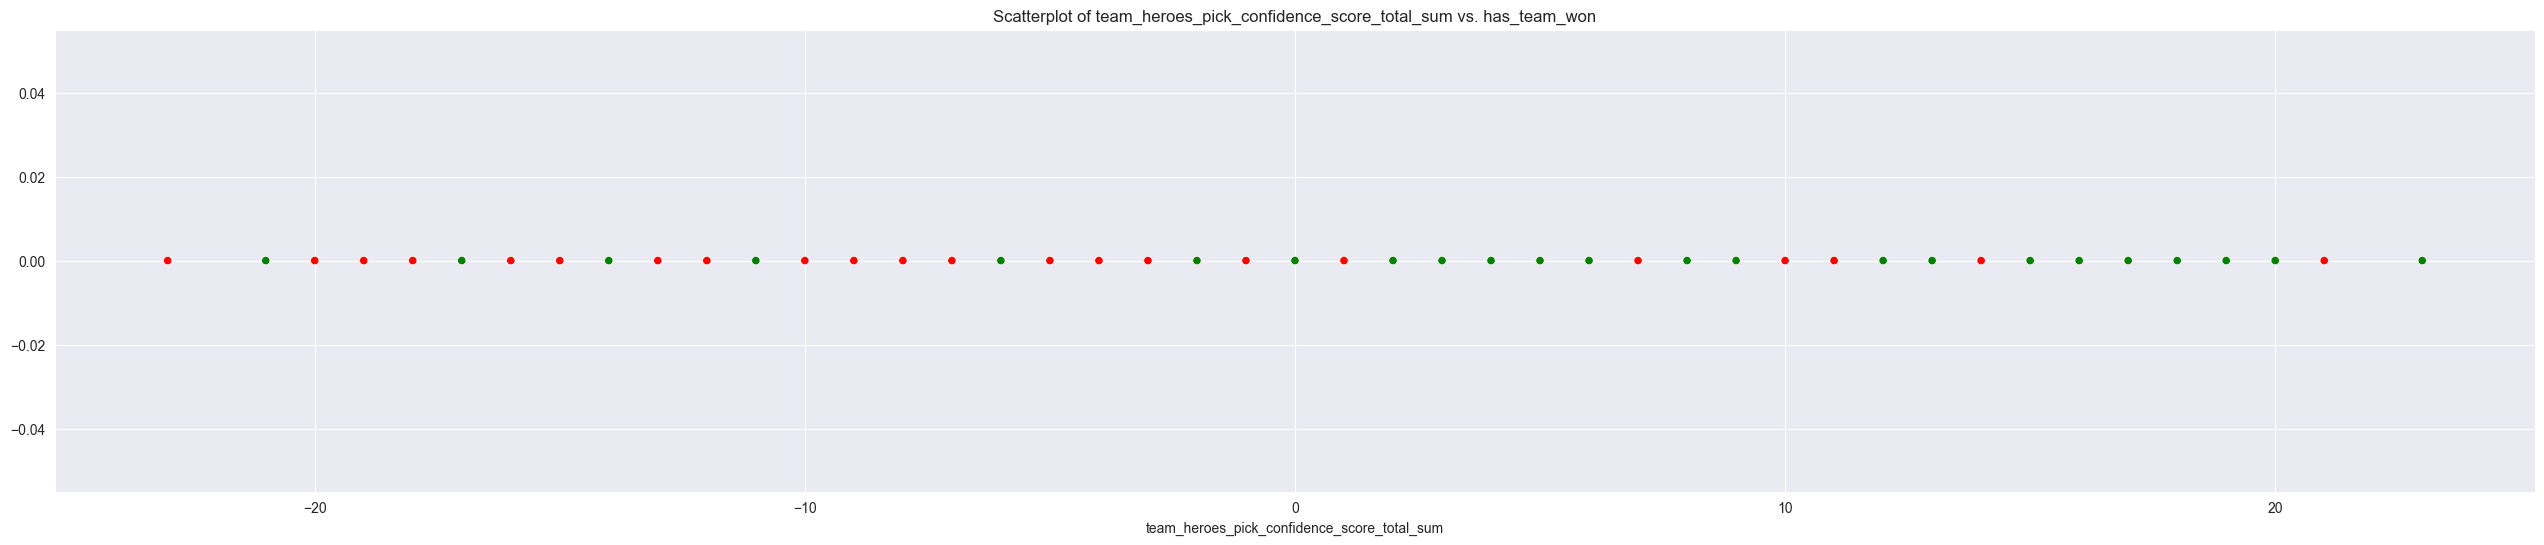

In [7]:
colors = {0: 'red', 1: 'green'}  # 0 for loss, 1 for win

feature = 'team_heroes_pick_confidence_score_total_sum'

df['dummy'] = 0

plt.figure(figsize=(32, 6))
sns.scatterplot(x=feature, y='dummy', hue='has_team_won', palette=colors, data=df, legend=None)

plt.xlabel(feature)
plt.ylabel('')
plt.title(f'Scatterplot of {feature} vs. has_team_won')

plt.show()

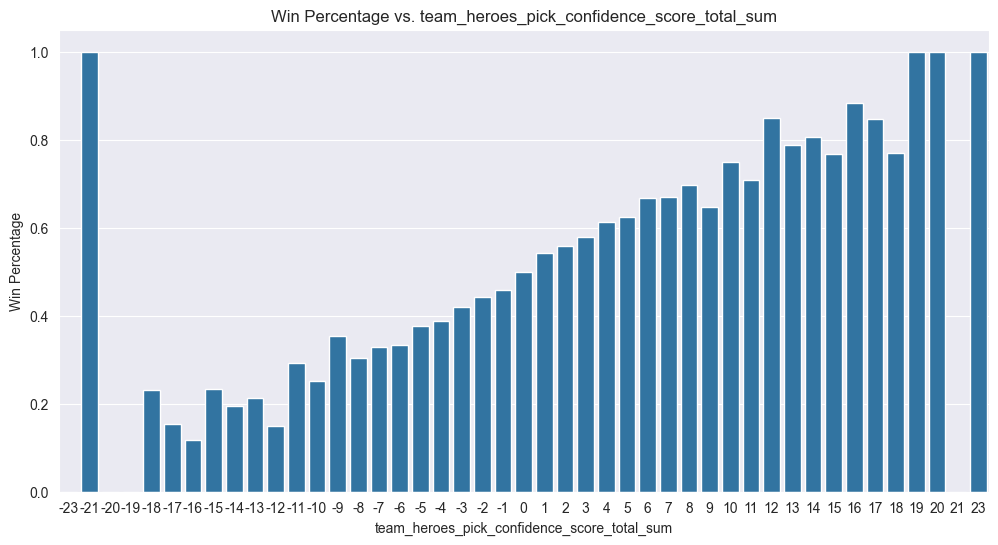

In [8]:
feature = 'team_heroes_pick_confidence_score_total_sum'

plt.figure(figsize=(12, 6))
sns.barplot(x=feature, y='has_team_won', data=df, errorbar=None)
plt.xlabel(f'{feature}')
plt.ylabel('Win Percentage')
plt.title(f'Win Percentage vs. {feature}')
plt.show()

We can observe a little problem with high abs(confidence_score) values. Since there should not be many of such matches, we will just get rid of those records.

In [30]:
df = df[abs(df['team_heroes_pick_confidence_score_total_sum']) < 21]

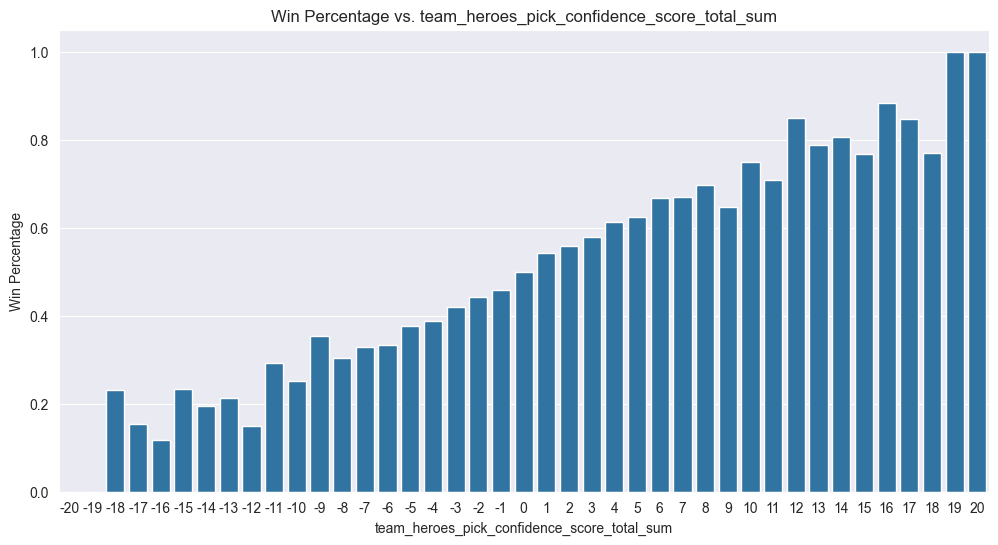

In [31]:
feature = 'team_heroes_pick_confidence_score_total_sum'

plt.figure(figsize=(12, 6))
sns.barplot(x=feature, y='has_team_won', data=df, errorbar=None)
plt.xlabel(f'{feature}')
plt.ylabel('Win Percentage')
plt.title(f'Win Percentage vs. {feature}')
plt.show()

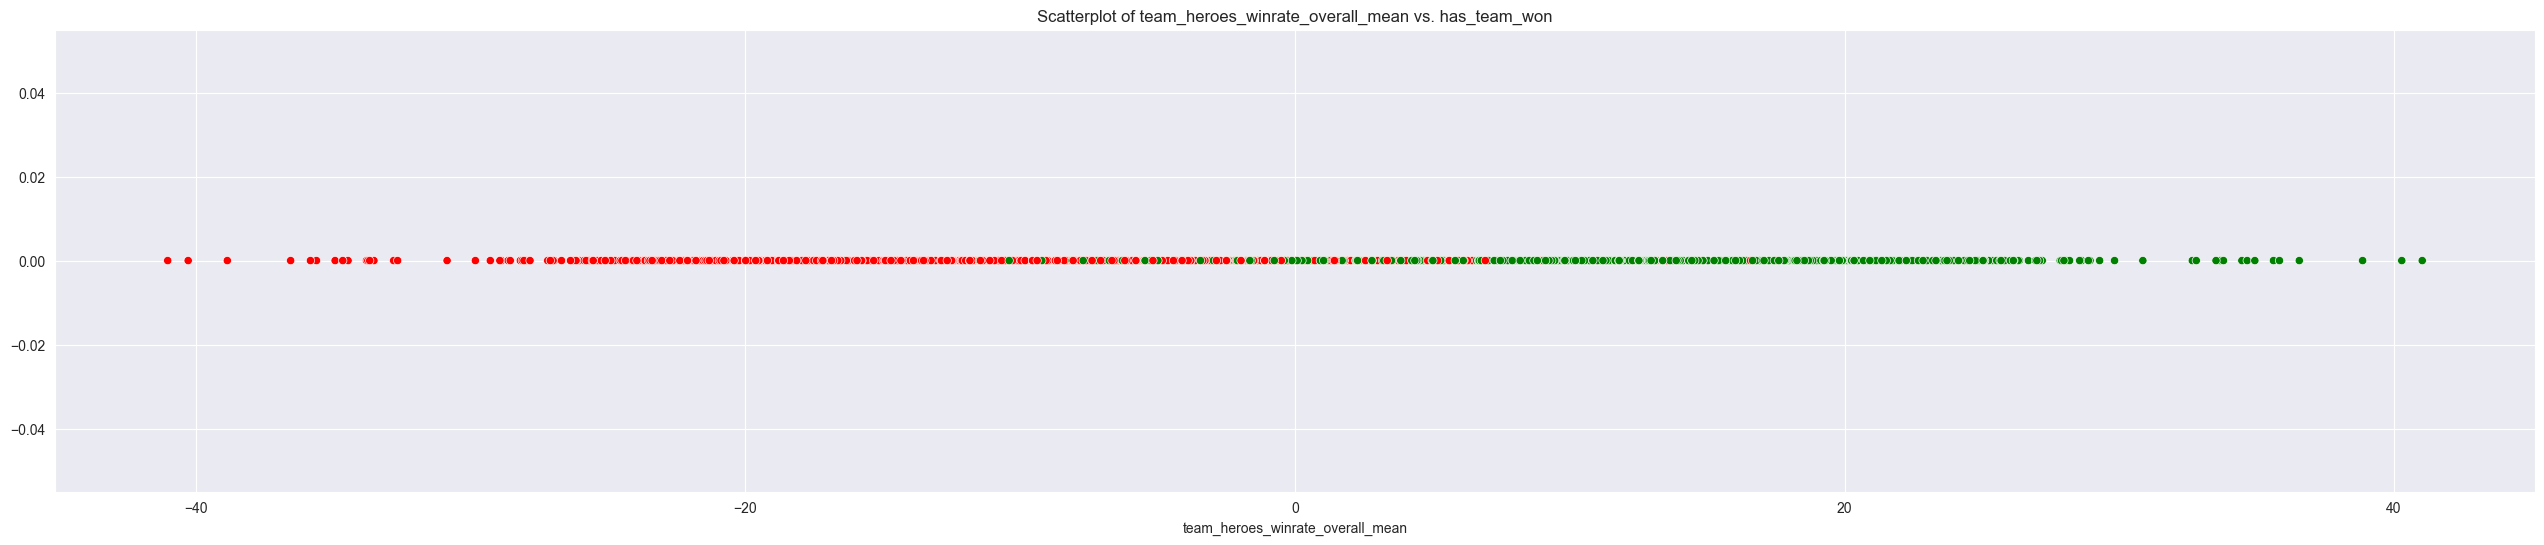

In [32]:
colors = {0: 'red', 1: 'green'}  # 0 for loss, 1 for win

feature = 'team_heroes_winrate_overall_mean'

df['dummy'] = 0

plt.figure(figsize=(32, 6))
sns.scatterplot(x=feature, y='dummy', hue='has_team_won', palette=colors, data=df, legend=None)

plt.xlabel(feature)
plt.ylabel('')
plt.title(f'Scatterplot of {feature} vs. has_team_won')

plt.show()

From the plots above we can clearly see that dataset obtained data-relations (and quite the promising ones as well) after all the processing and aggregations

### Prepare the data for training

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(columns=['has_team_won', 'dummy'])
y = df['has_team_won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (9833, 22)
Shape of X_test: (2459, 22)
Shape of y_train: (9833,)
Shape of y_test: (2459,)


In [34]:
X.head(10)

,team_q_mmr_diff_sum,team_heroes_winrate_overall_mean,team_heroes_total_matches_played_sum,team_players_dire_winrate_all_time_mean,team_players_dire_games_played_all_time_mean,team_players_radiant_winrate_all_time_mean,team_players_radiant_games_played_all_time_mean,team_heroes_pick_confidence_score_allies_sum,team_heroes_pick_confidence_score_enemies_sum,team_heroes_pick_confidence_score_total_sum,...,team_players_all_matches_played_number_mean,team_players_matches_abandonment_rate_mean,team_players_matches_lost_mean,team_players_matches_won_mean,team_players_match_rank_initial_mmr_mean,team_players_kda_average_all_matches_mean,team_heroes_pickrate_average_mean,team_heroes_winrate_average_mean,team_heroes_pickrate_for_rank_mean,team_heroes_winrate_for_rank_mean
0,1147,10.985433,993,-1.498229,1528.0,-0.830002,1409.4,-8,-3,-11,...,596.6,4.392295,305.8,290.8,229.4,-0.475690,4.914816,1.816724,4.16994,1.62654
1,1078,0.301894,191,-3.485422,812.8,-2.778400,754.6,4,1,5,...,1411.4,-0.571170,758.0,653.4,215.6,-1.285879,2.560724,0.982756,1.31134,1.40456
2,308,5.750341,131,2.017350,-1255.2,1.295491,-1291.0,0,10,10,...,-675.4,-2.515355,-341.0,-334.4,61.6,0.506771,-3.103768,1.648532,-3.93056,1.33496
3,-616,3.685672,862,-2.027335,2763.4,0.516487,2767.6,-2,6,4,...,4152.4,0.098363,2054.0,2098.4,-123.2,0.141931,-4.398308,2.334400,-3.72034,2.20772
4,-2310,6.930735,-125,-1.872473,451.8,-3.235953,443.0,4,-1,3,...,229.2,1.451957,155.4,73.8,-462.0,0.035616,3.331552,0.007632,3.41668,0.29068
5,-1848,-17.122664,-550,0.230736,-266.6,-0.760767,-259.2,5,-3,2,...,-504.2,-0.942566,-220.2,-284.0,-369.6,0.498322,3.060500,-0.826844,3.36810,-0.97776
6,-616,-0.273552,-331,1.884795,-1913.0,1.260623,-1897.8,-5,1,-4,...,-2234.6,1.902371,-1142.0,-1092.6,-123.2,0.159909,-7.553596,0.868612,-7.97700,1.07106
7,-308,7.079083,-208,-3.618822,1106.6,-1.431606,1108.0,-1,0,-1,...,1134.2,0.956069,599.2,535.0,-61.6,-0.960422,-4.417176,1.012380,-4.27788,1.09684
8,-2310,13.319439,34,0.190801,243.2,-1.949353,191.6,1,2,3,...,424.8,0.250546,222.4,202.4,-462.0,-0.183712,-3.779732,1.309988,-1.95162,2.00738
9,-308,-5.800618,-766,0.757684,169.0,1.174380,174.0,-3,-3,-6,...,1105.2,0.070867,531.8,573.4,-61.6,0.024588,-5.185940,-0.234672,-4.82374,-0.20616


### Examine dataset baseline

In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

majority_outcome = y_train.value_counts().idxmax()

baseline_model = DummyClassifier(strategy='most_frequent')

baseline_model.fit(X_train, y_train)

baseline_predictions = baseline_model.predict(X_test)

baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print('Baseline Accuracy:', baseline_accuracy)

Baseline Accuracy: 0.47905652704351365


Baseline accuracy is around 50% which suggest a reasonably balanced dataset.

### Train the RandomForest model

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=110, random_state=42, min_samples_split=110)

rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=110, n_estimators=110, random_state=42)

### Test the RandomForest model

In [37]:
y_pred = rf_model.predict(X_test)

y_train_pred = rf_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print('Training Accuracy:', train_accuracy)

print('Training Classification Report:')
print(classification_report(y_train, y_train_pred))

accuracy = accuracy_score(y_test, y_pred)
print('\nTest Accuracy:', accuracy)

print('Test Classification Report:')
print(classification_report(y_test, y_pred))

Training Accuracy: 0.8182650259330825
Training Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.82      0.82      4968
        True       0.82      0.81      0.82      4865

    accuracy                           0.82      9833
   macro avg       0.82      0.82      0.82      9833
weighted avg       0.82      0.82      0.82      9833


Test Accuracy: 0.7816185441236275
Test Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.79      0.78      1178
        True       0.80      0.78      0.79      1281

    accuracy                           0.78      2459
   macro avg       0.78      0.78      0.78      2459
weighted avg       0.78      0.78      0.78      2459


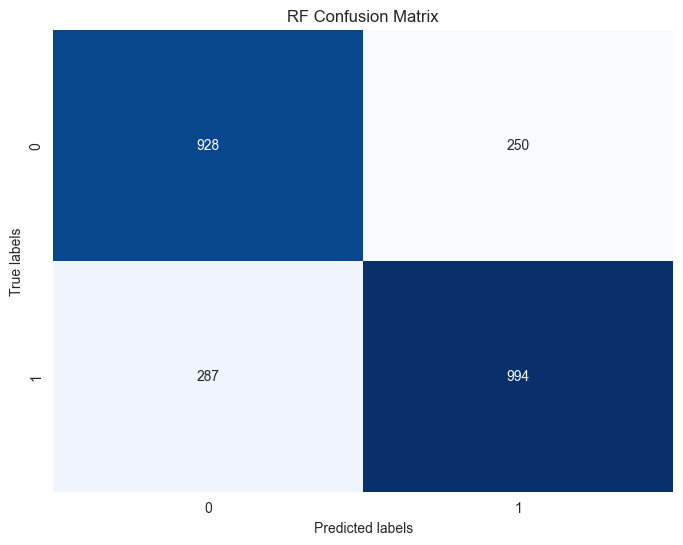

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('RF Confusion Matrix')
plt.show()

### Inspect the most important RF features

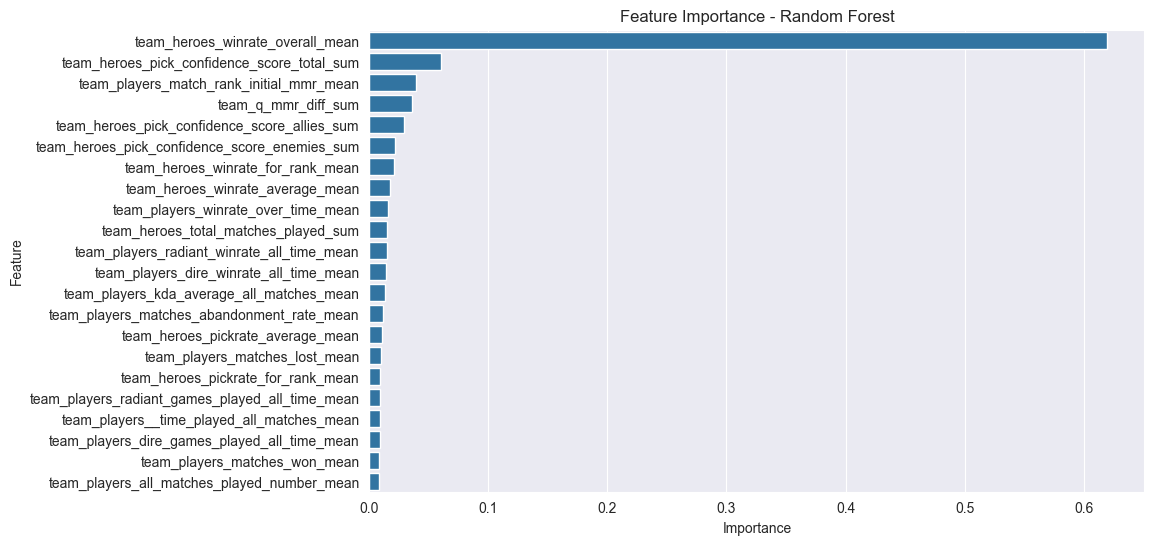

In [39]:
feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()

### Train the LogisticRegression model

Note: we use data standardization to improve algorithm's convergence

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'logisticregression__C': [0.0001, 0.001, 0.01, 0.02, 0.03, 0.08, 0.09, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

best_pipe = grid_search.best_estimator_
test_accuracy = best_pipe.score(X_test, y_test)
print('Test Accuracy:', test_accuracy)

Best Hyperparameters: {'logisticregression__C': 0.08, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Test Accuracy: 0.7901586010573404


### Test the LogisticRegression model

In [66]:
best_pipe.fit(X_train, y_train)

y_train_pred = best_pipe.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Training Accuracy:', train_accuracy)

print('Training Classification Report:')
print(classification_report(y_train, y_train_pred))

test_accuracy = best_pipe.score(X_test, y_test)
print('\nTest Accuracy:', test_accuracy)

y_pred = best_pipe.predict(X_test)
print('Test Classification Report:')
print(classification_report(y_test, y_pred))

Training Accuracy: 0.787450422048205
Training Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.79      0.79      4968
        True       0.79      0.78      0.78      4865

    accuracy                           0.79      9833
   macro avg       0.79      0.79      0.79      9833
weighted avg       0.79      0.79      0.79      9833


Test Accuracy: 0.7901586010573404
Test Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.80      0.79      1178
        True       0.81      0.78      0.79      1281

    accuracy                           0.79      2459
   macro avg       0.79      0.79      0.79      2459
weighted avg       0.79      0.79      0.79      2459


### Models' performance graphs

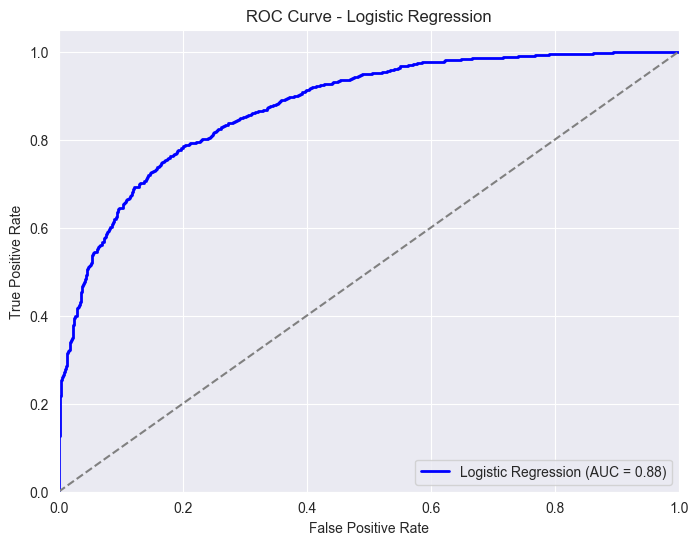

In [68]:
from sklearn.metrics import roc_curve, auc

y_pred_proba_lr = best_pipe.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='b', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc(fpr_lr, tpr_lr))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

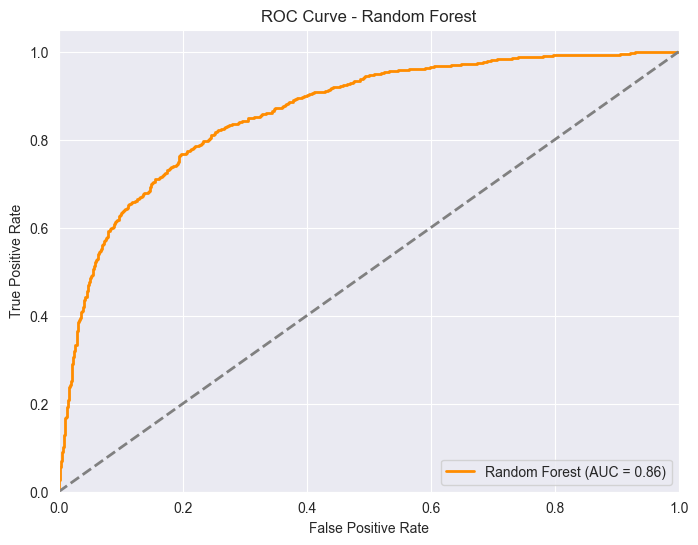

In [70]:
from sklearn.metrics import roc_curve, auc

y_score = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

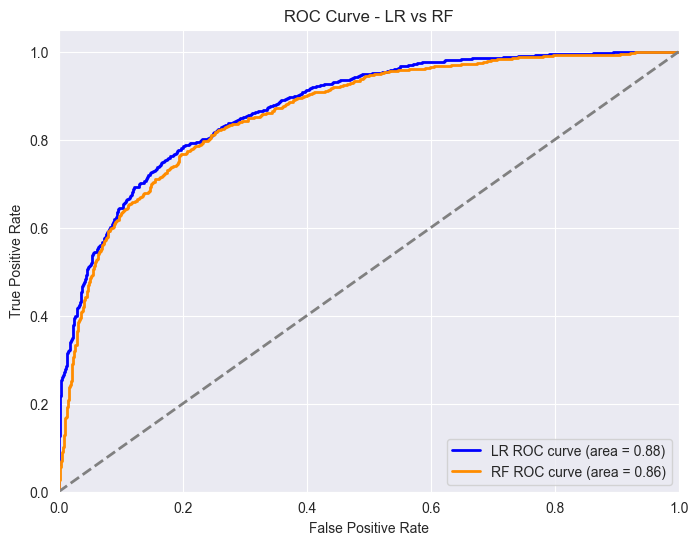

In [71]:
lr_y_score = best_pipe.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_score)
lr_roc_auc = auc(lr_fpr, lr_tpr)

rf_y_score = rf_model.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_score)
rf_roc_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(lr_fpr, lr_tpr, color='blue',
         lw=lw, label='LR ROC curve (area = %0.2f)' % lr_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='darkorange',
         lw=lw, label='RF ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LR vs RF')
plt.legend(loc="lower right")
plt.show()

### Inspect the most important LR features

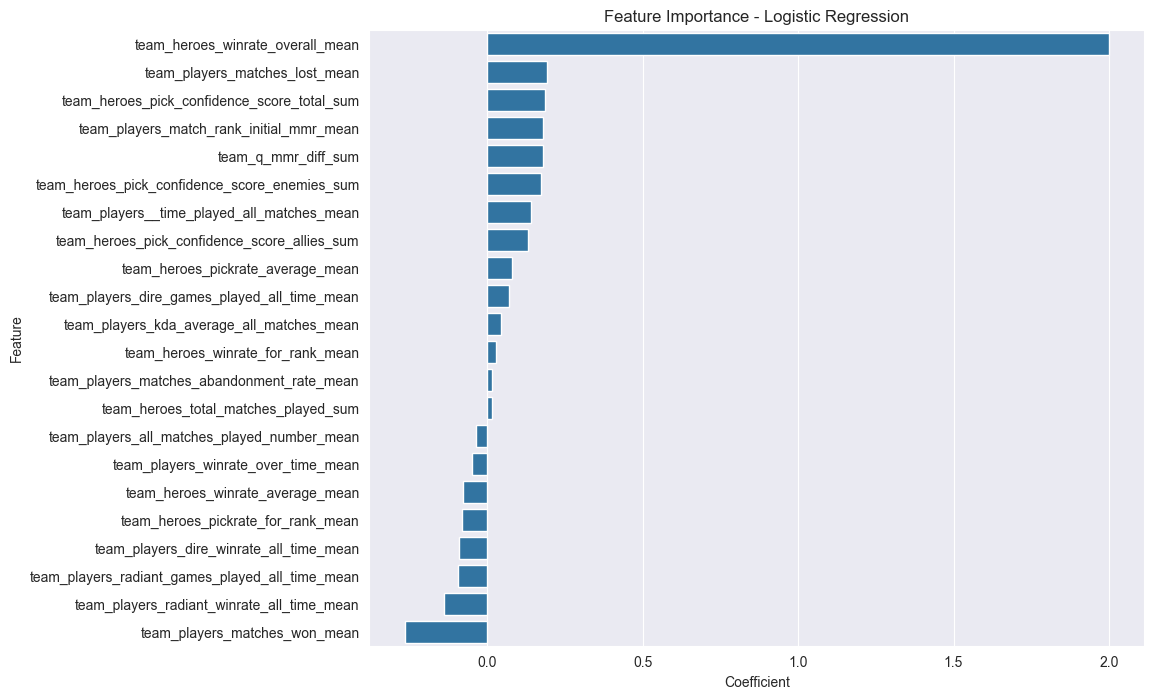

In [72]:
lr_coeffs = best_pipe.named_steps['logisticregression'].coef_[0]

feature_importance_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_coeffs})

feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lr)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

### Use KBest features to improve the LR model

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion

select_k_best = SelectKBest(k=13)
standard_scaler = best_pipe.named_steps['standardscaler']

new_pipe = make_pipeline(
    FeatureUnion([
        ('standard_scaler', standard_scaler),
        ('select_k_best', select_k_best)
    ]),
    LogisticRegression(max_iter=10000)
)

new_pipe.fit(X_train, y_train)

y_pred = new_pipe.predict(X_test)
score = new_pipe.score(X_test, y_test)

print(f'Accuracy: {score}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7925986173241155
Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.81      0.79      1178
        True       0.81      0.78      0.80      1281

    accuracy                           0.79      2459
   macro avg       0.79      0.79      0.79      2459
weighted avg       0.79      0.79      0.79      2459


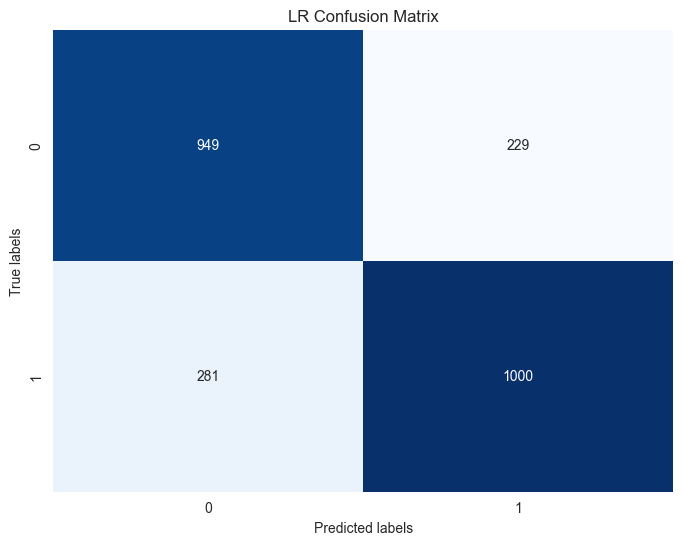

In [88]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('LR Confusion Matrix')
plt.show()

In [89]:
from joblib import dump

dump(rf_model, 'random_forest_model.joblib')
dump(pipe, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

## Conclusion

In scope of this notebook we trained two models: RandomForest and Logistic Regression. Both models achieved good results showcasing the accuracy scores of 77+%.
We also tried calibrating the LR model via feature-selection, achieving 0.25% additional accuracy.

From my personal experience as a Dota 2 player I could say the results are more than satisfying.